# Figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
result_data = pd.read_csv("Result_Data.csv", sep = ";", index_col=None)
result_data

,Scale,Number of Rates,Features,Number of Cases,Mean of Quality Metric
0,BVE,9,Geomorphology,5,0.018720
1,BVE,9,Geomorphology,10,0.020906
2,BVE,9,Geomorphology,15,0.019439
3,BVE,9,Geomorphology,20,0.019926
4,BVE,9,Geomorphology,25,0.020770
5,BVE,9,Saturation,5,0.007950
6,BVE,9,Saturation,10,0.008274
7,BVE,9,Saturation,15,0.007830
8,BVE,9,Saturation,20,0.008679
9,BVE,9,Saturation,25,0.008760


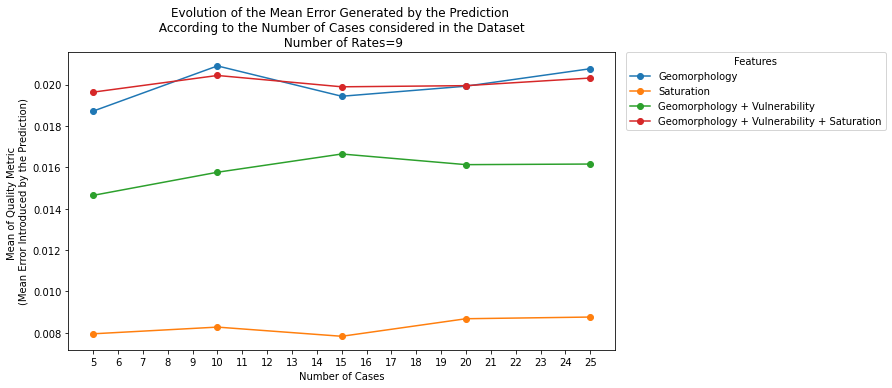

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def generate_figure_evolution_quality_according_number_cases(scale, nb_rates):
    # Data
    result_data = pd.read_csv("Result_Data.csv", sep = ";", index_col=None)
    res_bve = result_data.loc[(result_data["Scale"]==scale) & (result_data["Number of Rates"]==nb_rates)]
    #Plot
    plt.rcParams["figure.figsize"] = [12.50, 5.50]
    plt.rcParams["figure.autolayout"] = True
    for feature in res_bve.Features.unique():
        res = res_bve.loc[res_bve["Features"]==feature]
        res = res.sort_values("Number of Cases")
    #print(res)
        plt.plot(res['Number of Cases'], res["Mean of Quality Metric"], label=feature, marker="o")

    # Add title and axis names
    plt.title('Evolution of the Mean Error Generated by the Prediction \n According to the Number of Cases considered in the Dataset \n Number of Rates=' + str(nb_rates))
    plt.xlabel('Number of Cases')
    plt.ylabel('Mean of Quality Metric \n(Mean Error Introduced by the Prediction)')
    plt.xticks(range(5,26),range(5,26))
    plt.legend(title="Features", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    #plt.show()
    plt.savefig("Evolution_Quality_Number_Cases_"+ str(scale) + "_Rates_" + str(nb_rates) + ".pdf")
    return plt

plt = generate_figure_evolution_quality_according_number_cases("BVE", 9)
#plt

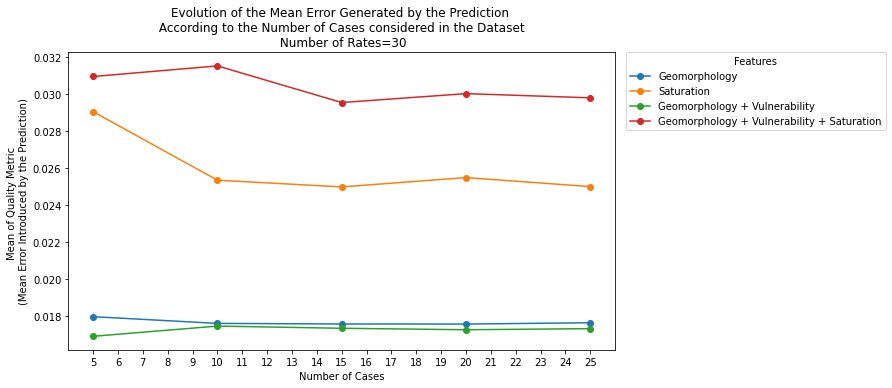

In [3]:
plt30 = generate_figure_evolution_quality_according_number_cases("BVE", 30)

In [11]:
def generate_figure_evolution_quality_according_number_rates(scale, nb_cases):
    # Data
    result_data = pd.read_csv("Result_Data.csv", sep = ";", index_col=None)
    res_bve = result_data.loc[(result_data["Scale"]==scale) & (result_data["Number of Cases"]==nb_cases)]
    #Plot
    plt.rcParams["figure.figsize"] = [12.50, 5.50]
    plt.rcParams["figure.autolayout"] = True
    for feature in res_bve.Features.unique():
        res = res_bve.loc[res_bve["Features"]==feature]
        res = res.sort_values("Number of Rates")
    #print(res)
        plt.plot(res['Number of Rates'], res["Mean of Quality Metric"], label=feature, marker="o")

    # Add title and axis names
    plt.title('Evolution of the Mean Error Generated by the Prediction \n According to the Number of Rates considered in the Dataset \n Number of cases=' + str(nb_cases))
    plt.xlabel('Number of Rates')
    plt.ylabel('Mean of Quality Metric \n(Mean Error Introduced by the Prediction)')
    plt.xticks([9,30],[9,30])
    plt.legend(title="Features", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    #plt.show()
    plt.savefig("Evolution_Quality_Number_Rates_"+ str(scale) + "_Cases_" + str(nb_cases) + ".pdf")
    return plt

In [12]:
for case in [5,10,15,20,25,30,35,40,45]:
    pltr = generate_figure_evolution_quality_according_number_rates("BVE", case)
    plt.figure().clear()
    plt.close()
    plt.clf()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 900x396 with 0 Axes>